# 데이터 준비

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv("../data/ch2_scores_em.csv", index_col="student number")

scores = np.array(df["english"][:10])
scores_df = pd.DataFrame({"scores": scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name="student"))

# 데이터 표준화

## 데이터 표준화

(각 데이터 - 평균) / 표준편차

In [228]:
z = (scores - np.mean(scores)) / np.std(scores)
print(z)

[-1.40182605  1.50965882  0.10783277 -1.50965882  0.21566555 -0.75482941
  1.07832773 -0.64699664  1.07832773  0.32349832]


### 평균을 50, 표준편차를 10으로 정규화

In [229]:
z = (scores - np.mean(scores)) / np.std(scores) * 10 + 50

In [230]:
# 기존 DataFrame에 병합
scores_df["deviation value"] = z

# 도수분포표

## 데이터 지표 확인

In [231]:
english_scores = np.array(df["english"])
print(pd.Series(english_scores).describe())

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64


## 도수분포도

계급 : 0~100을 10 간격으로 나눌 때 0~10, 10~20 등의 구간을 지칭  
도수 : 각 계급에 속한 데이터 수  
계급폭 : 각 구간의 폭 (10)  
계급 수 : 계급의 개수 (10)  
bins : 계급 수  
range : 데이터 범위  

### 도수

In [232]:
width=4
bins=25
freq, _ = np.histogram(english_scores, bins=bins, range=(0,100))
print(len(freq), freq)

25 [ 0  0  0  0  0  0  0  0  0  2  3  3  3  7  8  6 10  5  2  1  0  0  0  0
  0]


### 계급과 병합

In [233]:
freq_class = [f"{i}~{i+width}" for i in range(0,100,width)]

freq_dist_df = pd.DataFrame({"frequency": freq},
							index=pd.Index(freq_class, name="class"))
print(freq_dist_df)

        frequency
class            
0~4             0
4~8             0
8~12            0
12~16           0
16~20           0
20~24           0
24~28           0
28~32           0
32~36           0
36~40           2
40~44           3
44~48           3
48~52           3
52~56           7
56~60           8
60~64           6
64~68          10
68~72           5
72~76           2
76~80           1
80~84           0
84~88           0
88~92           0
92~96           0
96~100          0


### 계급값

각 계급을 대표하는 값. (각 계급의 중앙값을 사용)

In [234]:
class_value = [(i+i+width)//2 for i in range(0,100,width)]
print("class value :",class_value)

class value : [2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98]


### 상대도수

전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율

In [235]:
rel_freq = freq / freq.sum()
print("rel_freq :", rel_freq)

rel_freq : [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.06 0.06 0.14
 0.16 0.12 0.2  0.1  0.04 0.02 0.   0.   0.   0.   0.  ]


### 누적상대도수

**해당 계급까지의 상대도수의 합**  
누적되는 정도에 따라 해당 계급의 도수를 유추할 수 있음

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.1  0.16 0.22 0.36
 0.52 0.64 0.84 0.94 0.98 1.   1.   1.   1.   1.   1.  ]


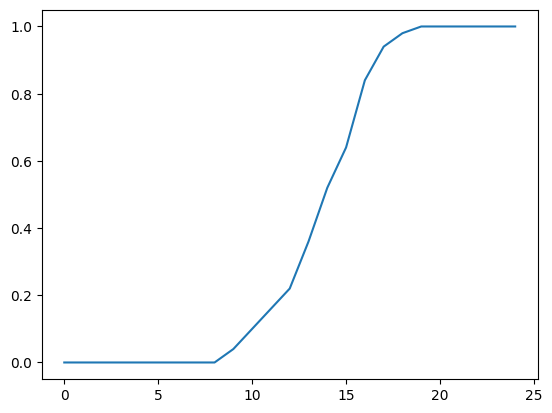

In [236]:
cum_rel_freq = np.cumsum(rel_freq)
print(cum_rel_freq)
import matplotlib.pyplot as plt
plt.plot(cum_rel_freq)
plt.show()

In [237]:
freq_dist_df["class value"] = class_value
freq_dist_df["relative frequency"] = rel_freq
freq_dist_df["cumulative relative frequency"] = cum_rel_freq
freq_dist_df = freq_dist_df[["class value", "frequency", "relative frequency", "cumulative relative frequency"]]
print(freq_dist_df)

        class value  frequency  relative frequency  \
class                                                
0~4               2          0                0.00   
4~8               6          0                0.00   
8~12             10          0                0.00   
12~16            14          0                0.00   
16~20            18          0                0.00   
20~24            22          0                0.00   
24~28            26          0                0.00   
28~32            30          0                0.00   
32~36            34          0                0.00   
36~40            38          2                0.04   
40~44            42          3                0.06   
44~48            46          3                0.06   
48~52            50          3                0.06   
52~56            54          7                0.14   
56~60            58          8                0.16   
60~64            62          6                0.12   
64~68            66         

In [238]:
mode = freq_dist_df.loc[freq_dist_df["frequency"].idxmax(), "class value"]
print(mode)

66


## 도수분포도 시각화

### 도수 및 누적상대도수 그래프

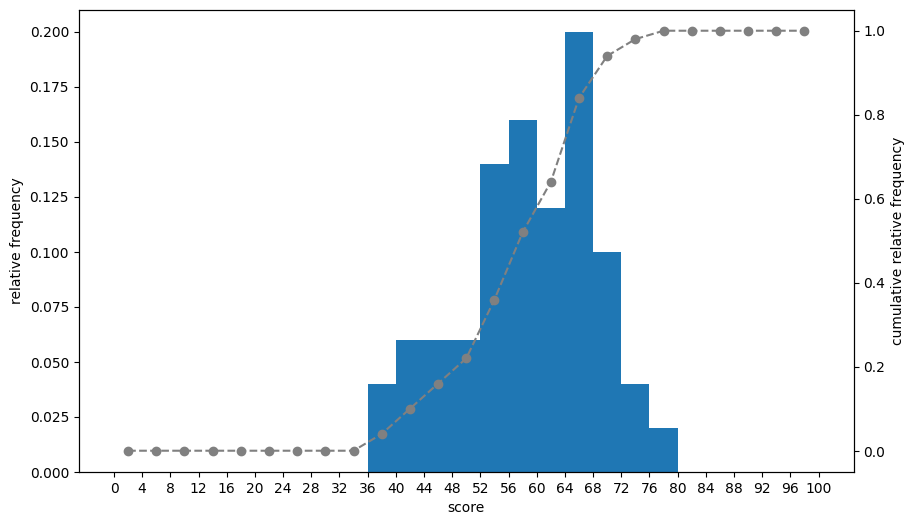

In [239]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores)/len(english_scores)
freq,_,_ = ax1.hist(english_scores, bins=bins, range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+i+width)//2 for i in range(0,100,width)]

ax2.plot(class_value, cum_rel_freq, ls="--", marker="o", color="gray")
ax2.grid(visible=False)

ax1.set_xlabel("score")
ax1.set_ylabel("relative frequency")
ax2.set_ylabel("cumulative relative frequency")
ax1.set_xticks(np.linspace(0,100,bins+1))
# ax1.set_yticks(np.arange(0,freq.max()+1))
plt.show()

### 사분위 범위 그래프

/tmp/ipykernel_11590/3475389108.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(english_scores, labels=["english"])


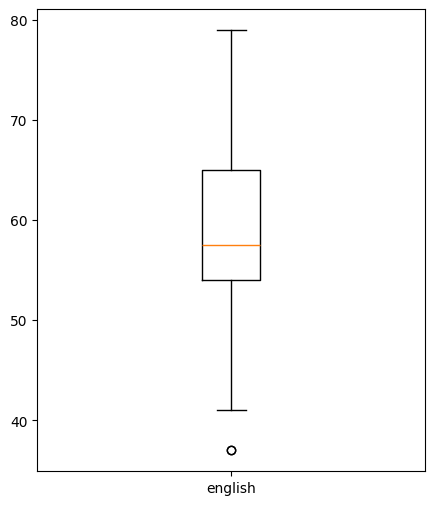

In [242]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=["english"])
plt.show()

### subplot 실습

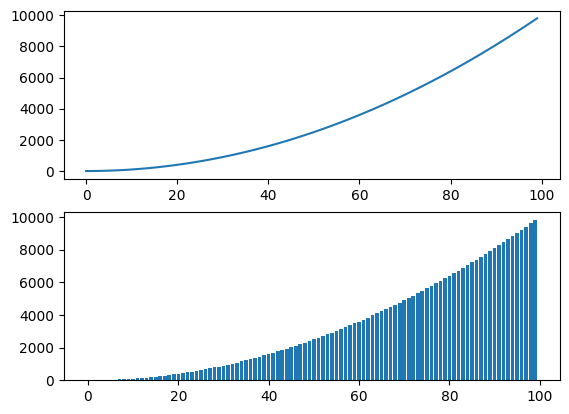

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

x = range(100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y)
plt.show()